In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
signals = pd.read_csv("E:/Python Programs/Signals.csv", index_col="sample")
signals.drop(columns="id",inplace=True)
signals.head()

,sign_type,r1,g1,b1,r2,g2,b2,r3,g3,b3,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
sample,,,,,,,,,,,,,,,,,,,,,
train,pedestrian,155,228,251,135,188,101,156,227,245,...,244,172,228,235,177,235,244,22,52,53
train,pedestrian,142,217,242,166,204,44,142,217,242,...,237,182,228,143,171,228,196,164,227,237
train,pedestrian,57,54,50,187,201,68,51,51,45,...,59,76,84,22,82,93,17,58,60,60
train,pedestrian,22,35,41,171,178,26,19,27,29,...,34,64,61,4,211,222,78,19,27,29
train,pedestrian,169,179,170,231,254,27,97,107,99,...,91,188,205,78,125,147,20,160,183,187


In [3]:
signals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, train to example
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sign_type  206 non-null    object
 1   r1         206 non-null    int64 
 2   g1         206 non-null    int64 
 3   b1         206 non-null    int64 
 4   r2         206 non-null    int64 
 5   g2         206 non-null    int64 
 6   b2         206 non-null    int64 
 7   r3         206 non-null    int64 
 8   g3         206 non-null    int64 
 9   b3         206 non-null    int64 
 10  r4         206 non-null    int64 
 11  g4         206 non-null    int64 
 12  b4         206 non-null    int64 
 13  r5         206 non-null    int64 
 14  g5         206 non-null    int64 
 15  b5         206 non-null    int64 
 16  r6         206 non-null    int64 
 17  g6         206 non-null    int64 
 18  b6         206 non-null    int64 
 19  r7         206 non-null    int64 
 20  g7         206 non-null    in

In [4]:
len(signals.loc["train"]), len(signals.loc["test"])

(146, 59)

In [5]:
signals.loc["example"].values

array(['stop', 204, 227, 220, 196, 59, 51, 202, 67, 59, 204, 227, 220,
       236, 250, 234, 242, 252, 235, 205, 148, 131, 190, 50, 43, 179, 70,
       57, 242, 229, 212, 190, 50, 43, 193, 51, 44, 170, 197, 196, 190,
       50, 43, 190, 47, 41, 165, 195, 196], dtype=object)

In [6]:
signals.shape

(206, 49)

In [7]:
signals.tail()

,sign_type,r1,g1,b1,r2,g2,b2,r3,g3,b3,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
sample,,,,,,,,,,,,,,,,,,,,,
train,stop,74,78,65,145,56,55,124,57,54,...,65,125,34,34,130,36,36,109,118,106
test,stop,237,249,245,220,59,53,220,59,53,...,154,221,67,59,220,59,53,177,179,165
train,stop,162,187,181,114,47,38,115,51,41,...,209,115,51,41,115,51,41,218,238,226
test,stop,161,187,181,51,21,20,52,24,22,...,166,51,21,20,51,21,20,172,198,193
example,stop,204,227,220,196,59,51,202,67,59,...,196,190,50,43,190,47,41,165,195,196


In [8]:
signals.rename(index={"example": "test"}).tail()

,sign_type,r1,g1,b1,r2,g2,b2,r3,g3,b3,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
sample,,,,,,,,,,,,,,,,,,,,,
train,stop,74,78,65,145,56,55,124,57,54,...,65,125,34,34,130,36,36,109,118,106
test,stop,237,249,245,220,59,53,220,59,53,...,154,221,67,59,220,59,53,177,179,165
train,stop,162,187,181,114,47,38,115,51,41,...,209,115,51,41,115,51,41,218,238,226
test,stop,161,187,181,51,21,20,52,24,22,...,166,51,21,20,51,21,20,172,198,193
test,stop,204,227,220,196,59,51,202,67,59,...,196,190,50,43,190,47,41,165,195,196


In [9]:
signals.rename(index={"example": "test"}, inplace=True)

In [10]:
len(signals.loc["train"]), len(signals.loc["test"])

(146, 60)

In [11]:
X_train = signals.loc["train"]

In [12]:
X_train.head()

,sign_type,r1,g1,b1,r2,g2,b2,r3,g3,b3,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
sample,,,,,,,,,,,,,,,,,,,,,
train,pedestrian,155,228,251,135,188,101,156,227,245,...,244,172,228,235,177,235,244,22,52,53
train,pedestrian,142,217,242,166,204,44,142,217,242,...,237,182,228,143,171,228,196,164,227,237
train,pedestrian,57,54,50,187,201,68,51,51,45,...,59,76,84,22,82,93,17,58,60,60
train,pedestrian,22,35,41,171,178,26,19,27,29,...,34,64,61,4,211,222,78,19,27,29
train,pedestrian,169,179,170,231,254,27,97,107,99,...,91,188,205,78,125,147,20,160,183,187


In [13]:
X_train.reset_index(drop=True, inplace=True)
X_train.head()

,sign_type,r1,g1,b1,r2,g2,b2,r3,g3,b3,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
0,pedestrian,155,228,251,135,188,101,156,227,245,...,244,172,228,235,177,235,244,22,52,53
1,pedestrian,142,217,242,166,204,44,142,217,242,...,237,182,228,143,171,228,196,164,227,237
2,pedestrian,57,54,50,187,201,68,51,51,45,...,59,76,84,22,82,93,17,58,60,60
3,pedestrian,22,35,41,171,178,26,19,27,29,...,34,64,61,4,211,222,78,19,27,29
4,pedestrian,169,179,170,231,254,27,97,107,99,...,91,188,205,78,125,147,20,160,183,187


In [14]:
X_train.drop("sign_type",axis=1).head()

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
0,155,228,251,135,188,101,156,227,245,145,...,244,172,228,235,177,235,244,22,52,53
1,142,217,242,166,204,44,142,217,242,147,...,237,182,228,143,171,228,196,164,227,237
2,57,54,50,187,201,68,51,51,45,59,...,59,76,84,22,82,93,17,58,60,60
3,22,35,41,171,178,26,19,27,29,19,...,34,64,61,4,211,222,78,19,27,29
4,169,179,170,231,254,27,97,107,99,123,...,91,188,205,78,125,147,20,160,183,187


In [15]:
X_train.drop("sign_type",axis=1, inplace=True)
X_train.head()

C:\Users\skong\AppData\Local\Temp\ipykernel_16980\537644577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop("sign_type",axis=1, inplace=True)


,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
0,155,228,251,135,188,101,156,227,245,145,...,244,172,228,235,177,235,244,22,52,53
1,142,217,242,166,204,44,142,217,242,147,...,237,182,228,143,171,228,196,164,227,237
2,57,54,50,187,201,68,51,51,45,59,...,59,76,84,22,82,93,17,58,60,60
3,22,35,41,171,178,26,19,27,29,19,...,34,64,61,4,211,222,78,19,27,29
4,169,179,170,231,254,27,97,107,99,123,...,91,188,205,78,125,147,20,160,183,187


In [16]:
y_train = signals.loc["train"]["sign_type"]

In [17]:
y_train.head()

sample
train    pedestrian
train    pedestrian
train    pedestrian
train    pedestrian
train    pedestrian
Name: sign_type, dtype: object

In [18]:
y_train.reset_index(drop=True, inplace=True)
y_train.head()

0    pedestrian
1    pedestrian
2    pedestrian
3    pedestrian
4    pedestrian
Name: sign_type, dtype: object

In [19]:
X_train.index.values, y_train.index.values

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145], dtype=int64),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26, 

In [20]:
signals.head()

,sign_type,r1,g1,b1,r2,g2,b2,r3,g3,b3,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
sample,,,,,,,,,,,,,,,,,,,,,
train,pedestrian,155,228,251,135,188,101,156,227,245,...,244,172,228,235,177,235,244,22,52,53
train,pedestrian,142,217,242,166,204,44,142,217,242,...,237,182,228,143,171,228,196,164,227,237
train,pedestrian,57,54,50,187,201,68,51,51,45,...,59,76,84,22,82,93,17,58,60,60
train,pedestrian,22,35,41,171,178,26,19,27,29,...,34,64,61,4,211,222,78,19,27,29
train,pedestrian,169,179,170,231,254,27,97,107,99,...,91,188,205,78,125,147,20,160,183,187


In [21]:
X_test = signals.loc["test"]
X_test.shape

(60, 49)

In [22]:
X_test.head()

,sign_type,r1,g1,b1,r2,g2,b2,r3,g3,b3,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
sample,,,,,,,,,,,,,,,,,,,,,
test,pedestrian,118,105,69,244,245,67,132,123,12,...,75,131,124,5,106,94,53,101,91,59
test,pedestrian,221,244,237,52,45,26,205,233,229,...,13,74,51,13,34,30,18,50,38,14
test,pedestrian,44,50,43,98,69,25,170,182,172,...,20,94,65,20,97,67,21,49,38,19
test,pedestrian,78,106,102,98,125,82,65,91,75,...,77,91,108,100,49,62,57,45,58,52
test,pedestrian,163,181,172,53,51,36,170,181,171,...,59,53,51,36,67,75,67,74,81,70


In [23]:
X_test.reset_index(drop=True,inplace=True)
X_test.drop("sign_type",axis=1).head()

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
0,118,105,69,244,245,67,132,123,12,138,...,75,131,124,5,106,94,53,101,91,59
1,221,244,237,52,45,26,205,233,229,203,...,13,74,51,13,34,30,18,50,38,14
2,44,50,43,98,69,25,170,182,172,170,...,20,94,65,20,97,67,21,49,38,19
3,78,106,102,98,125,82,65,91,75,100,...,77,91,108,100,49,62,57,45,58,52
4,163,181,172,53,51,36,170,181,171,44,...,59,53,51,36,67,75,67,74,81,70


In [24]:
X_test.drop("sign_type",axis=1, inplace=True)
X_test.head()

C:\Users\skong\AppData\Local\Temp\ipykernel_16980\564374866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop("sign_type",axis=1, inplace=True)


,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
0,118,105,69,244,245,67,132,123,12,138,...,75,131,124,5,106,94,53,101,91,59
1,221,244,237,52,45,26,205,233,229,203,...,13,74,51,13,34,30,18,50,38,14
2,44,50,43,98,69,25,170,182,172,170,...,20,94,65,20,97,67,21,49,38,19
3,78,106,102,98,125,82,65,91,75,100,...,77,91,108,100,49,62,57,45,58,52
4,163,181,172,53,51,36,170,181,171,44,...,59,53,51,36,67,75,67,74,81,70


In [25]:
y_test=signals.loc["test"]["sign_type"]
y_test.head()

sample
test    pedestrian
test    pedestrian
test    pedestrian
test    pedestrian
test    pedestrian
Name: sign_type, dtype: object

In [26]:
y_test.reset_index(drop=True, inplace=True)

In [27]:
y_test.head()

0    pedestrian
1    pedestrian
2    pedestrian
3    pedestrian
4    pedestrian
Name: sign_type, dtype: object

In [28]:
X_train.shape, y_train.shape

((146, 48), (146,))

In [29]:
X_test.shape, y_test.shape

((60, 48), (60,))

In [30]:
# sns.pairplot(data=signals, hue="sign_type")

In [31]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.85)

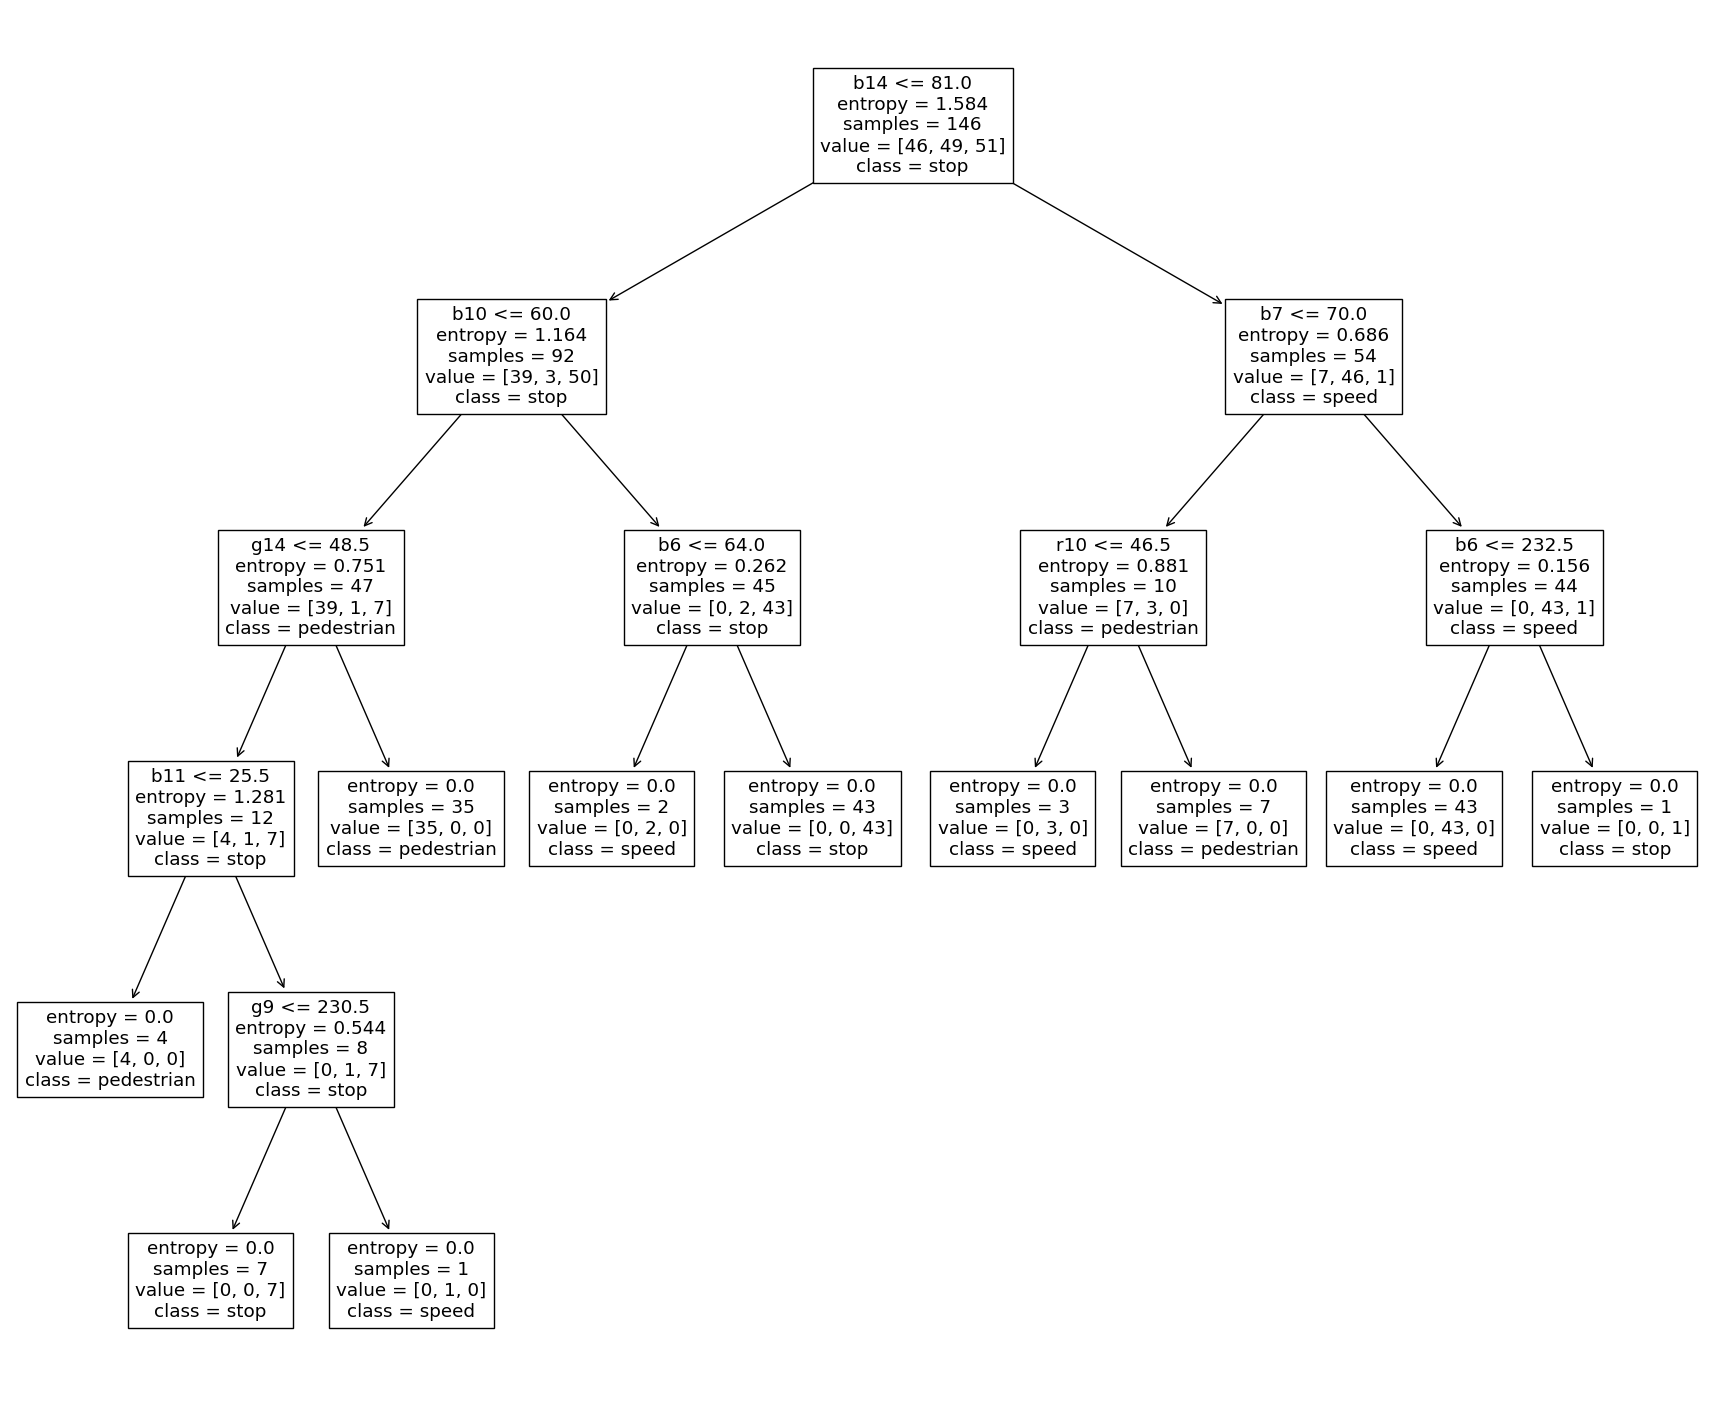

In [32]:
plt.figure(figsize=[22,18])
plot_tree(decision_tree=model, feature_names=X_train.columns, class_names=model.classes_)
plt.show()

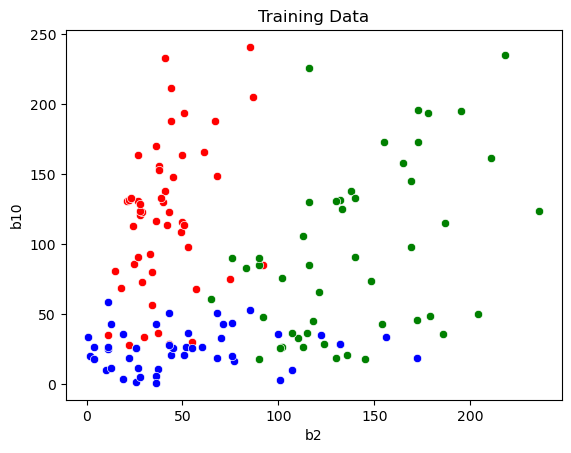

In [33]:
sns.scatterplot(data=X_train[y_train=="stop"], x="b2", y="b10", c="red")
sns.scatterplot(data=X_train[y_train=="speed"], x="b2", y="b10", c="green") 
sns.scatterplot(data=X_train[y_train=="pedestrian"], x="b2", y="b10", c="blue")
plt.title("Training Data")
plt.xlabel("b2")
plt.ylabel("b10")
plt.show()

In [34]:
signals.sign_type.value_counts()

sign_type
stop          71
speed         70
pedestrian    65
Name: count, dtype: int64

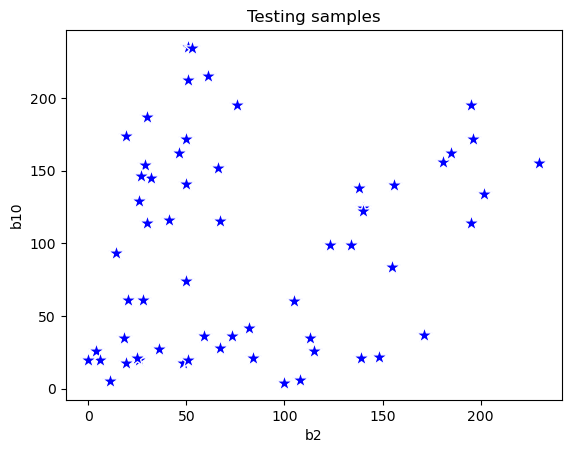

In [35]:
sns.scatterplot(data=X_test, x="b2", y="b10", marker='*',c='blue',s=150)
plt.title("Testing samples")
plt.xlabel("b2")
plt.ylabel("b10")
plt.show()

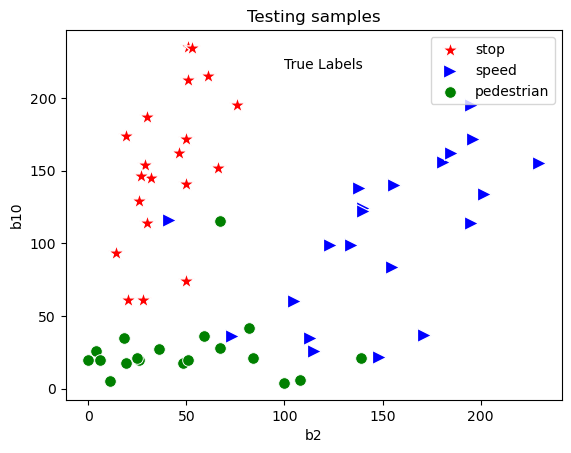

In [55]:
# Revelaing the original test results/True Values

sns.scatterplot(data=X_test[y_test=="stop"], x="b2", y="b10", marker='*',c='red',s=150,label="stop")
sns.scatterplot(data=X_test[y_test=="speed"], x="b2", y="b10", marker='>',c='blue',s=100, label="speed")
sns.scatterplot(data=X_test[y_test=="pedestrian"], x="b2", y="b10", marker='o',c='green',s=70, label="pedestrian")
plt.title("Testing samples")
plt.xlabel("b2")
plt.ylabel("b10")
plt.text(100,220,"True Labels")
plt.legend()
plt.show()

In [37]:
y_predict=model.predict(X_test)
y_predict

array(['stop', 'pedestrian', 'pedestrian', 'pedestrian', 'pedestrian',
       'stop', 'pedestrian', 'pedestrian', 'pedestrian', 'pedestrian',
       'pedestrian', 'pedestrian', 'pedestrian', 'pedestrian',
       'pedestrian', 'pedestrian', 'pedestrian', 'pedestrian',
       'pedestrian', 'pedestrian', 'speed', 'speed', 'speed', 'speed',
       'speed', 'speed', 'speed', 'stop', 'speed', 'speed', 'speed',
       'speed', 'speed', 'speed', 'speed', 'speed', 'speed', 'speed',
       'speed', 'speed', 'speed', 'stop', 'stop', 'stop', 'stop', 'speed',
       'stop', 'speed', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop',
       'stop', 'speed', 'stop', 'stop', 'speed', 'stop'], dtype=object)

In [38]:
y_test.values

array(['pedestrian', 'pedestrian', 'pedestrian', 'pedestrian',
       'pedestrian', 'pedestrian', 'pedestrian', 'pedestrian',
       'pedestrian', 'pedestrian', 'pedestrian', 'pedestrian',
       'pedestrian', 'pedestrian', 'pedestrian', 'pedestrian',
       'pedestrian', 'pedestrian', 'pedestrian', 'speed', 'speed',
       'speed', 'speed', 'speed', 'speed', 'speed', 'speed', 'speed',
       'speed', 'speed', 'speed', 'speed', 'speed', 'speed', 'speed',
       'speed', 'speed', 'speed', 'speed', 'speed', 'stop', 'stop',
       'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop',
       'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop',
       'stop', 'stop'], dtype=object)

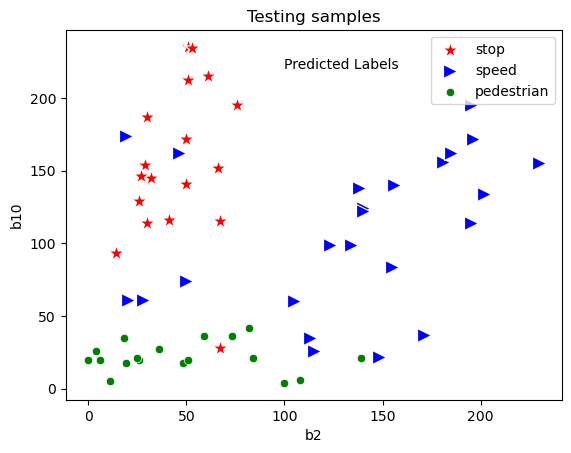

In [52]:
# Plotting the test results predicted by the machine

sns.scatterplot(data=X_test[y_predict=="stop"], x="b2", y="b10", marker='*',c='red',s=150,label="stop")
sns.scatterplot(data=X_test[y_predict=="speed"], x="b2", y="b10", marker='>',c='blue',s=100, label="speed")
sns.scatterplot(data=X_test[y_predict=="pedestrian"], x="b2", y="b10", marker='o',c='green', label="pedestrian")
plt.title("Testing samples")
plt.xlabel("b2")
plt.ylabel("b10")
plt.text(100,220,"Predicted Labels")
plt.legend()
plt.show()

In [40]:
X_test[y_predict!=y_test]

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
0,118,105,69,244,245,67,132,123,12,138,...,75,131,124,5,106,94,53,101,91,59
5,117,137,132,116,105,67,58,53,27,37,...,22,18,26,22,19,28,26,19,28,26
19,21,35,36,50,69,73,50,69,73,28,...,36,50,69,73,50,69,73,28,42,42
27,67,75,68,36,46,41,43,51,44,30,...,50,76,74,54,92,90,68,89,86,65
40,124,133,159,220,41,50,204,37,47,121,...,83,239,76,68,239,68,75,115,98,75
45,146,170,156,42,28,28,45,35,35,178,...,21,42,28,28,42,28,28,155,171,147
47,148,176,185,59,16,19,124,21,25,58,...,53,116,25,27,107,22,25,74,74,53
55,156,169,157,130,50,46,125,44,42,85,...,69,162,164,163,123,38,36,61,67,51
58,161,187,181,51,21,20,52,24,22,131,...,166,51,21,20,51,21,20,172,198,193


In [56]:
y_test[y_predict!=y_test]

0     pedestrian
5     pedestrian
19         speed
27         speed
40          stop
45          stop
47          stop
55          stop
58          stop
Name: sign_type, dtype: object

In [41]:
accuracy_score(y_test, y_predict)

0.85

In [42]:
confusion_matrix(y_test,y_predict)

array([[17,  0,  2],
       [ 1, 19,  1],
       [ 0,  5, 15]], dtype=int64)

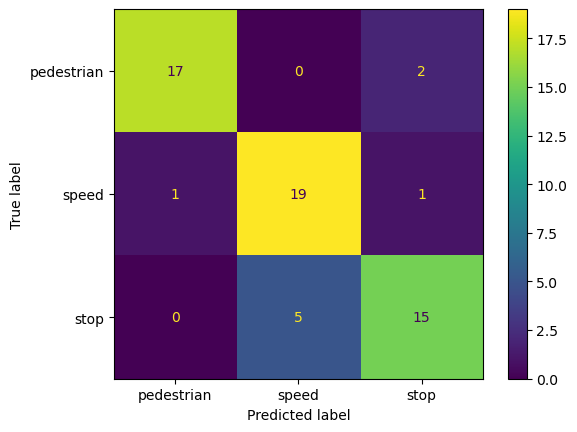

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

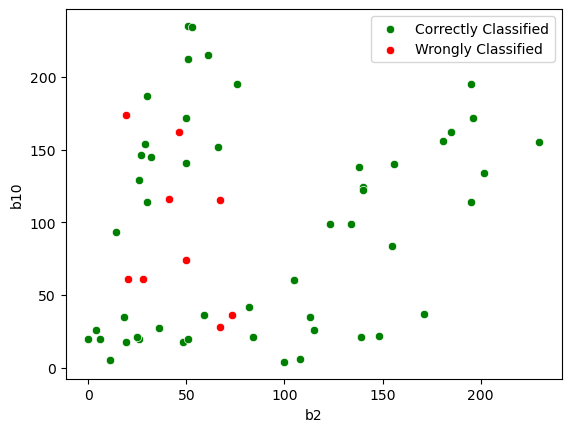

In [44]:
sns.scatterplot(data=X_test[y_predict==y_test], x="b2", y="b10", c='green', label="Correctly Classified")
sns.scatterplot(data=X_test[y_predict!=y_test], x="b2", y="b10", c='red', label="Wrongly Classified")
plt.xlabel("b2")
plt.ylabel("b10")
plt.legend()
plt.show()